W= [2.]
b= 8.881784197001252e-16
[ 8. 10.]


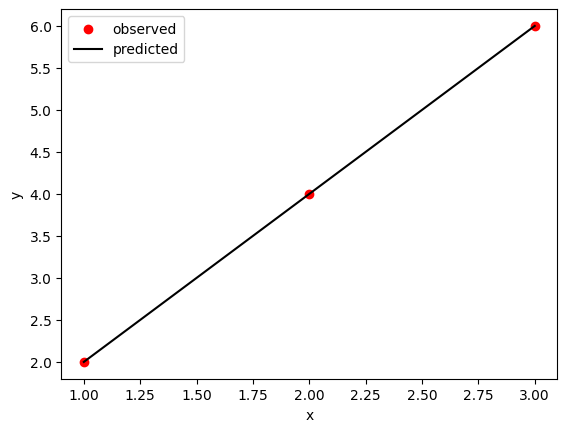

In [2]:
# Lab 2 Linear Regression
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# X and Y data
x_train = [1, 2, 3]
y_train = [2, 4, 6]

# Try to find values for W and b to compute y_data = x_data * W + b
# We know that W should be 1 and b should be 0

x_train = np.array(x_train)
y_train = np.array(y_train)

line_fitter = LinearRegression()

line_fitter.fit(x_train.reshape(-1,1), y_train)
# 주의사항: X는 vector 형태로 되어있어야 함 (reshape의 이유)

print ("W=",line_fitter.coef_)
print ("b=",line_fitter.intercept_)
print (line_fitter.predict([[4],[5]]))

plt.figure()
plt.scatter(x_train,y_train, color='red', label='observed')
plt.plot(x_train, line_fitter.predict(x_train.reshape(-1,1)), 'k-', label="predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Tensor flow intorduction  
http://datahacker.rs/tensorflow-constants-and-variables/  
  
Ranking  
https://viso.ai/deep-learning/deep-learning-frameworks/

In [1]:
import tensorflow as tf
import numpy as np

print (tf.multiply(3,2))

# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# add
result = tf.add(x1, x2)

# Print the result
print(result)

a = [[1,2],[3,4]]
b = [[1,0],[0,1]]

c = np.array(a)
d = np.array(b)

print (tf.multiply(a,b))
print (tf.linalg.matmul(a,b))

print (tf.multiply(c,d))
print (tf.linalg.matmul(c,d))



tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor([ 6  8 10 12], shape=(4,), dtype=int32)
tf.Tensor(
[[1 0]
 [0 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1 0]
 [0 4]], shape=(2, 2), dtype=int64)
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int64)


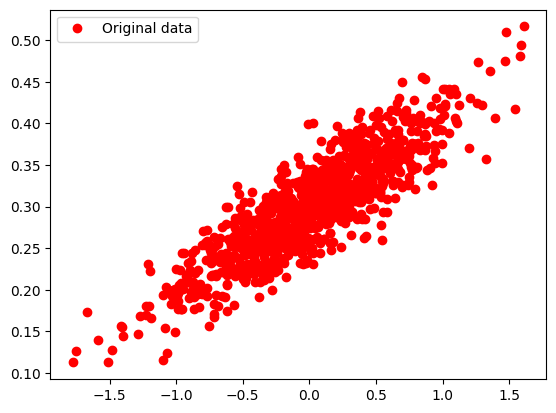

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 89ms/step
Prediction: [[0.39994162]]
weight: [[0.10129021]] bias: [0.2986514]


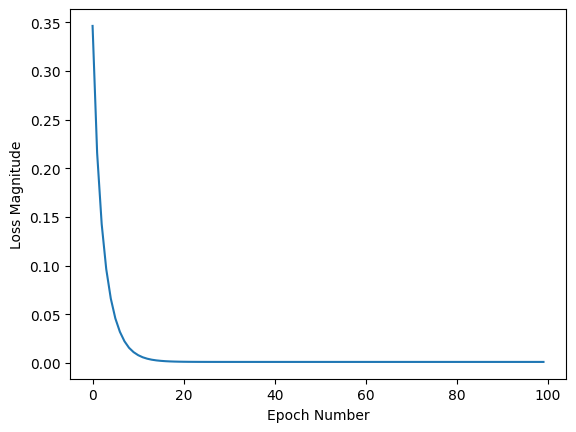

32/32 [==============================] - 0s 1ms/step


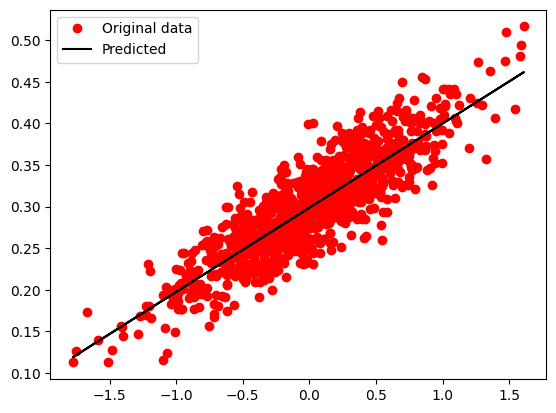

In [3]:
# From https://www.tensorflow.org/get_started/get_started

import numpy as np

#---------------------1. Data generation------------------------------
num_points = 1000

vectors_set = []
for i in range(num_points):
         x1= np.random.normal(0.0, 0.55)
         y1= x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
         vectors_set.append([x1, y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]


#----------------------2. plot ---------------------------------------

import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(x_data, y_data, 'ro', label='Original data')
plt.legend()
plt.show()

#---------------------3. Tensorflow ---------------------------------

import tensorflow as tf

# Define layer
layer0 = tf.keras.layers.Dense(units=1, input_shape=[1])

model = tf.keras.Sequential([layer0])
model.summary()

# Compile model
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.SGD())
              #optimizer=tf.keras.optimizers.Adam())

# MSE: https://en.wikipedia.org/wiki/Mean_squared_error
# Adam (original literature) : https://arxiv.org/pdf/1412.6980.pdf
# Optimizer: https://onevision.tistory.com/entry/Optimizer-%EC%9D%98-%EC%A2%85%EB%A5%98%EC%99%80-%ED%8A%B9%EC%84%B1-Momentum-RMSProp-Adam

# Train the model
history = model.fit(x_data, y_data, epochs=100, verbose=0)

# Prediction
print('Prediction: {}'.format(model.predict([1])))

# Get weight and bias
weights = layer0.get_weights()
print('weight: {} bias: {}'.format(weights[0], weights[1]))

plt.figure(2)
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()

plt.figure(3)
plt.plot(x_data, y_data, 'ro', label='Original data')
plt.plot(x_data, model.predict(x_data), 'k-', label = "Predicted")
plt.legend()
plt.show()

#--------------------4. sklearn ? -----------------------------------
